<a href="https://colab.research.google.com/github/chiruconew/REP_PRUEBA/blob/main/ProyFinalPruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [147]:
url = 'https://raw.githubusercontent.com/chiruconew/EXTRA/main/data_set_dg.csv'
df  = pd.read_csv(url)

In [148]:
df.head()

,TELEFONO,CUOTA_BASICA,TIPO_PRODUCTO,CAPACIDAD_PLAN_DATOS,NIT,ANEXOS_HOME,ANEXOS_MOBILE,MESES_CLIENTE_ANTIGUEDAD,MESES_CONTRATO,DEPARTAMENTO_GUATEMALA,INICIO_DE_CONTRATO,SUBSIDIO,PAGO_DEVICE_CLIENTE,PROMEDIO_CONSUMO_DATOS_GB,CONSUMO_PORCENT_CUOTA,FACTURAS_PAGADAS_EN_TIEMPO,FACTURAS_PAGADAS_TARDE,CANTIDAD_ABONOS_PARA_PAGAR_AVG,AVG_DIAS_PAGO_A_TIEMPO,AVG_DIAS_PAGO_TARDE,DOWNSELL
0,52017983,198.9904,C,5,153912-4,0.0,1.0,246.0,18.0,GUATEMALA,06-OCT-16 00:00:00,NaN,NaN,1.0,0.18,0.0,10.0,1.0,0.0,-4.0,NO
1,55287011,499.0048,C,20,4930230-2,3.0,2.0,200.0,24.0,ESCUINTLA,07-JAN-19 00:00:00,3042.17,1607.14,10.0,0.51,8.0,2.0,1.0,2.0,-1.0,NO
2,53187495,298.9952,C,15,1199130-5,0.0,3.0,98.0,24.0,GUATEMALA,03-JAN-20 00:00:00,1237.57,207.36,5.0,0.33,10.0,0.0,1.0,8.0,0.0,NO
3,57813259,224.9968,Q,14,87103923,0.0,1.0,39.0,0.0,SOLOLA,21-AUG-20 00:00:00,NaN,NaN,18.0,1.29,4.0,4.0,1.0,17.0,-18.0,NO
4,40152016,298.9952,C,15,1526520-K,0.0,1.0,16.0,24.0,SAN MARCOS,15-NOV-19 00:00:00,1441.82,0.90,8.0,0.50,6.0,4.0,2.0,18.0,-5.0,NO


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18032 entries, 0 to 18031
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TELEFONO                        18032 non-null  int64  
 1   CUOTA_BASICA                    18032 non-null  float64
 2   TIPO_PRODUCTO                   18032 non-null  object 
 3   CAPACIDAD_PLAN_DATOS            18032 non-null  int64  
 4   NIT                             18032 non-null  object 
 5   ANEXOS_HOME                     13008 non-null  float64
 6   ANEXOS_MOBILE                   13008 non-null  float64
 7   MESES_CLIENTE_ANTIGUEDAD        17468 non-null  float64
 8   MESES_CONTRATO                  17468 non-null  float64
 9   DEPARTAMENTO_GUATEMALA          17468 non-null  object 
 10  INICIO_DE_CONTRATO              17468 non-null  object 
 11  SUBSIDIO                        13852 non-null  float64
 12  PAGO_DEVICE_CLIENTE             

In [150]:
df_recortado = df.dropna()
df_recortado.describe()

,TELEFONO,CUOTA_BASICA,CAPACIDAD_PLAN_DATOS,ANEXOS_HOME,ANEXOS_MOBILE,MESES_CLIENTE_ANTIGUEDAD,MESES_CONTRATO,SUBSIDIO,PAGO_DEVICE_CLIENTE,PROMEDIO_CONSUMO_DATOS_GB,CONSUMO_PORCENT_CUOTA,FACTURAS_PAGADAS_EN_TIEMPO,FACTURAS_PAGADAS_TARDE,CANTIDAD_ABONOS_PARA_PAGAR_AVG,AVG_DIAS_PAGO_A_TIEMPO,AVG_DIAS_PAGO_TARDE
count,1.015700e+04,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000,10157.000000
mean,4.548819e+07,472.932098,23.733090,0.883332,3.134489,116.457025,22.339470,2574.829244,983.451752,14.381018,0.676460,6.370385,3.453087,1.181451,9.918972,-3.286699
std,9.781400e+06,213.122423,14.728745,5.787397,49.861048,103.561452,2.751016,1990.478584,1680.415196,10.357149,0.424278,3.900478,3.689090,0.404848,8.314043,6.151343
min,3.000016e+07,98.996800,1.000000,0.000000,1.000000,2.000000,0.000000,-8879.250000,-8212.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-166.000000
25%,3.712187e+07,298.995200,15.000000,0.000000,1.000000,48.000000,18.000000,1385.730000,0.890000,7.000000,0.360000,3.000000,0.000000,1.000000,3.000000,-4.000000
50%,4.843955e+07,399.000000,20.000000,0.000000,1.000000,100.000000,24.000000,1890.520000,133.040000,12.000000,0.660000,7.000000,2.000000,1.000000,8.000000,-2.000000
75%,5.308374e+07,598.998400,30.000000,0.000000,2.000000,161.000000,24.000000,3617.410000,1383.040000,19.000000,0.930000,9.000000,7.000000,1.000000,16.000000,0.000000
max,5.999998e+07,1498.000000,70.000000,386.000000,3234.000000,1475.000000,24.000000,13266.570000,9496.860000,104.000000,6.960000,54.000000,56.000000,9.000000,169.000000,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb887a5f550>,
      dtype=object)

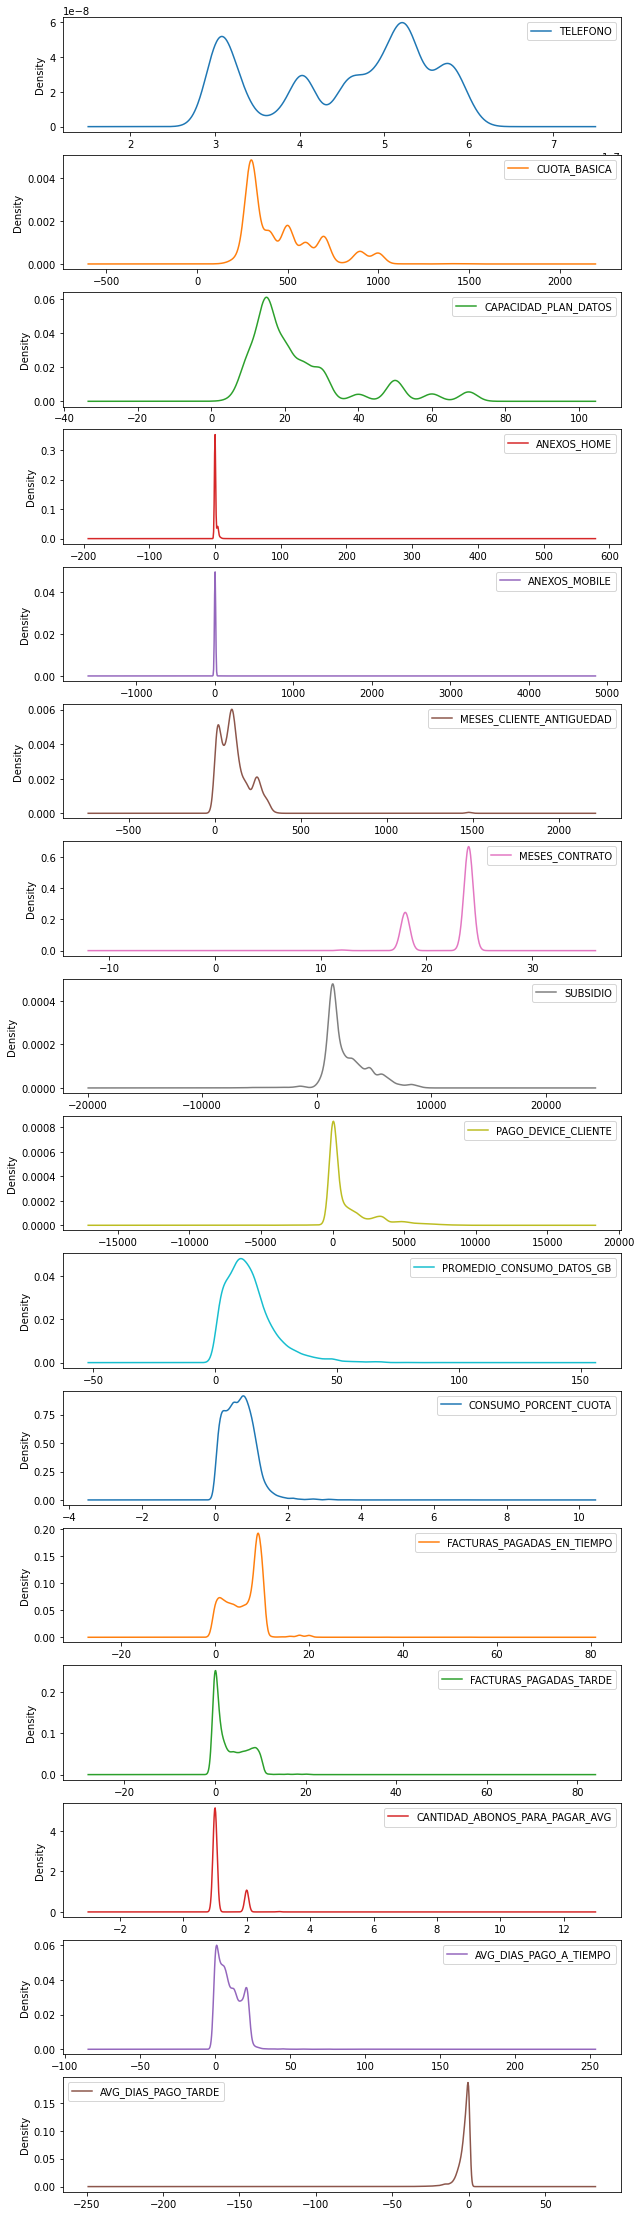

In [151]:
df_recortado.plot.kde(subplots=True, figsize=(10,40), sharex=False)

In [152]:
df_recortado = df_recortado[df_recortado['CAPACIDAD_PLAN_DATOS'] > 0]
df_recortado = df_recortado[df_recortado['CUOTA_BASICA'] > 0]
df_recortado = df_recortado[df_recortado['ANEXOS_HOME'] < 20]
df_recortado = df_recortado[df_recortado['ANEXOS_MOBILE'] < 20]
df_recortado = df_recortado[df_recortado['MESES_CLIENTE_ANTIGUEDAD'] < 400]
df_recortado = df_recortado[df_recortado['MESES_CONTRATO'] > 0]

In [153]:
df_recortado.describe()

,TELEFONO,CUOTA_BASICA,CAPACIDAD_PLAN_DATOS,ANEXOS_HOME,ANEXOS_MOBILE,MESES_CLIENTE_ANTIGUEDAD,MESES_CONTRATO,SUBSIDIO,PAGO_DEVICE_CLIENTE,PROMEDIO_CONSUMO_DATOS_GB,CONSUMO_PORCENT_CUOTA,FACTURAS_PAGADAS_EN_TIEMPO,FACTURAS_PAGADAS_TARDE,CANTIDAD_ABONOS_PARA_PAGAR_AVG,AVG_DIAS_PAGO_A_TIEMPO,AVG_DIAS_PAGO_TARDE
count,1.010500e+04,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,4.550176e+07,472.875275,23.726076,0.782583,1.812271,113.607125,22.344582,2574.453436,981.058981,14.378624,0.676235,6.368926,3.453340,1.181000,9.911628,-3.289263
std,9.778781e+06,212.987097,14.718639,1.843204,1.300575,82.079529,2.739772,1991.265486,1678.353535,10.352905,0.423415,3.895262,3.687601,0.403855,8.309126,6.161921
min,3.000016e+07,98.996800,1.000000,0.000000,1.000000,2.000000,12.000000,-8879.250000,-8212.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-166.000000
25%,3.712868e+07,298.995200,15.000000,0.000000,1.000000,48.000000,18.000000,1385.730000,0.890000,7.000000,0.360000,3.000000,0.000000,1.000000,3.000000,-4.000000
50%,4.846119e+07,399.000000,20.000000,0.000000,1.000000,100.000000,24.000000,1890.520000,133.040000,12.000000,0.660000,7.000000,2.000000,1.000000,8.000000,-2.000000
75%,5.308419e+07,598.998400,30.000000,0.000000,2.000000,160.000000,24.000000,3617.410000,1375.670000,19.000000,0.930000,9.000000,7.000000,1.000000,16.000000,0.000000
max,5.999998e+07,1498.000000,70.000000,17.000000,18.000000,369.000000,24.000000,13266.570000,9496.860000,104.000000,6.960000,54.000000,56.000000,9.000000,169.000000,0.000000


In [233]:
df_recortado['DOWNSELL'].replace({"NO": 0, "SI": 1}, inplace=True)



In [236]:
df_recortado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 1 to 17466
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TELEFONO                        10105 non-null  int64  
 1   CUOTA_BASICA                    10105 non-null  float64
 2   TIPO_PRODUCTO                   10105 non-null  object 
 3   CAPACIDAD_PLAN_DATOS            10105 non-null  int64  
 4   NIT                             10105 non-null  object 
 5   ANEXOS_HOME                     10105 non-null  float64
 6   ANEXOS_MOBILE                   10105 non-null  float64
 7   MESES_CLIENTE_ANTIGUEDAD        10105 non-null  float64
 8   MESES_CONTRATO                  10105 non-null  float64
 9   DEPARTAMENTO_GUATEMALA          10105 non-null  object 
 10  INICIO_DE_CONTRATO              10105 non-null  object 
 11  SUBSIDIO                        10105 non-null  float64
 12  PAGO_DEVICE_CLIENTE             

In [154]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [155]:
ss = StandardScaler()
yj_std = PowerTransformer(method='yeo-johnson', standardize=True)

In [156]:
VC_nums = ["CUOTA_BASICA", "CAPACIDAD_PLAN_DATOS", "ANEXOS_HOME", "ANEXOS_MOBILE", "MESES_CLIENTE_ANTIGUEDAD", "MESES_CONTRATO", 
            "SUBSIDIO", "PAGO_DEVICE_CLIENTE", "PROMEDIO_CONSUMO_DATOS_GB", "CONSUMO_PORCENT_CUOTA", "FACTURAS_PAGADAS_EN_TIEMPO", 
            "FACTURAS_PAGADAS_TARDE", "CANTIDAD_ABONOS_PARA_PAGAR_AVG", "AVG_DIAS_PAGO_A_TIEMPO", "AVG_DIAS_PAGO_TARDE"]
response_var = "DOWNSELL"

In [157]:
transformed_VC_nums = yj_std.fit_transform(df_recortado[VC_nums])
transformed_VC_nums_df = pd.DataFrame(transformed_VC_nums, columns=VC_nums)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning:

divide by zero encountered in log



In [237]:
transformed_VC_nums_df['DOWNSELL'] = df_recortado['DOWNSELL']

In [238]:
transformed_VC_nums_df[transformed_VC_nums_df.columns[1:]].corr()['DOWNSELL'][:]

CAPACIDAD_PLAN_DATOS              0.004646
ANEXOS_HOME                       0.018440
ANEXOS_MOBILE                     0.006120
MESES_CLIENTE_ANTIGUEDAD         -0.008332
MESES_CONTRATO                   -0.001744
SUBSIDIO                          0.004616
PAGO_DEVICE_CLIENTE              -0.001185
PROMEDIO_CONSUMO_DATOS_GB        -0.024751
CONSUMO_PORCENT_CUOTA            -0.028617
FACTURAS_PAGADAS_EN_TIEMPO       -0.012980
FACTURAS_PAGADAS_TARDE            0.003310
CANTIDAD_ABONOS_PARA_PAGAR_AVG    0.005440
AVG_DIAS_PAGO_A_TIEMPO            0.021406
AVG_DIAS_PAGO_TARDE              -0.013976
DOWNSELL                          1.000000
Name: DOWNSELL, dtype: float64

In [158]:
corr = transformed_VC_nums_df.corr()

In [159]:
cmap = sns.diverging_palette(15, 250, s=100, l=30, as_cmap=True)

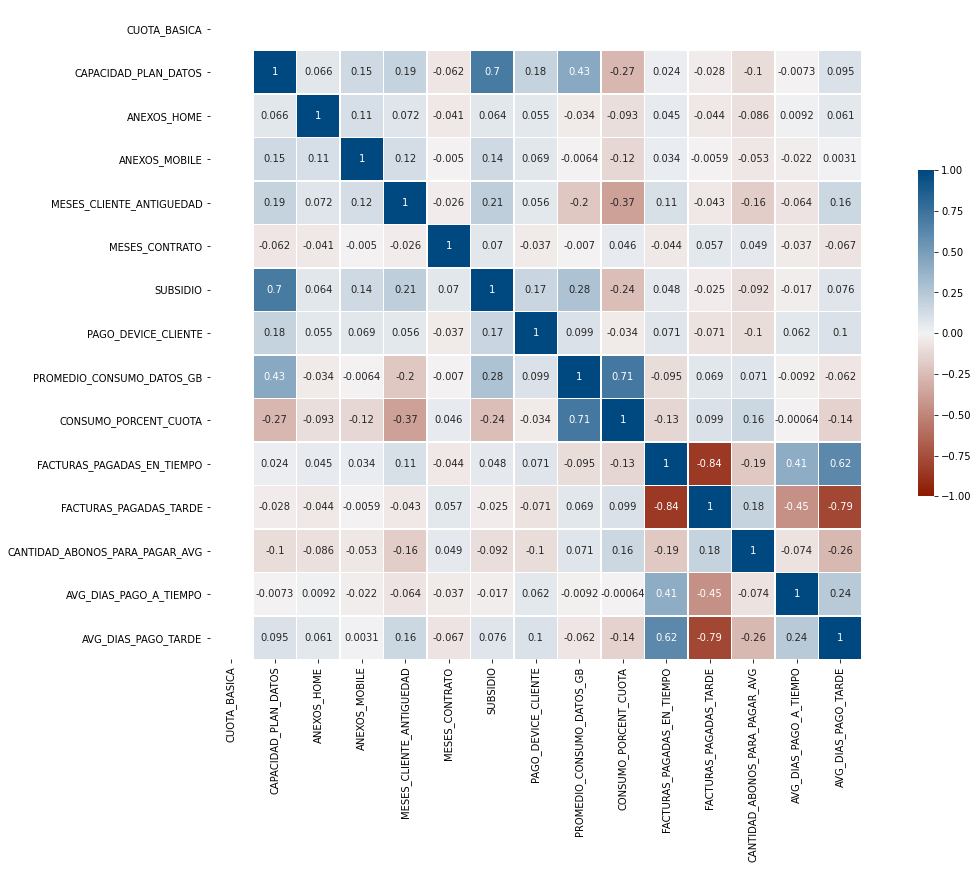

In [160]:
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corr, cmap=cmap, center=0,
square=True, linewidths=.5, vmin=-1, vmax=1, cbar_kws={"shrink": .5}, annot=True);

In [161]:
corr_matrix = corr.abs()
corr_threshold = 0.7 # <-- arbitrary
high_corr_var = np.where(corr_matrix > corr_threshold)

In [162]:
# Columns with high correlation
[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

[('PROMEDIO_CONSUMO_DATOS_GB', 'CONSUMO_PORCENT_CUOTA'),
 ('FACTURAS_PAGADAS_EN_TIEMPO', 'FACTURAS_PAGADAS_TARDE'),
 ('FACTURAS_PAGADAS_TARDE', 'AVG_DIAS_PAGO_TARDE')]

In [163]:
df_train = df_recortado[["CUOTA_BASICA", "CAPACIDAD_PLAN_DATOS", "ANEXOS_HOME", "ANEXOS_MOBILE", "MESES_CLIENTE_ANTIGUEDAD", "MESES_CONTRATO", 
            "SUBSIDIO", "PAGO_DEVICE_CLIENTE", "CONSUMO_PORCENT_CUOTA", "FACTURAS_PAGADAS_EN_TIEMPO", 
            "CANTIDAD_ABONOS_PARA_PAGAR_AVG", "AVG_DIAS_PAGO_A_TIEMPO"]]

In [164]:
!pip install category_encoders

# MESES CONTRATO

**CountEncoder**

In [165]:
from category_encoders import CountEncoder

In [166]:
df_recortado['MESES_CONTRATO'].unique()

array([24., 18., 12.])

In [167]:
df_train.loc[df_train['MESES_CONTRATO'] == 12, 'MESES_CONT_NAME'] = 'DOCE'
df_train.loc[df_train['MESES_CONTRATO'] == 24, 'MESES_CONT_NAME'] = 'VEINTICUATRO'
df_train.loc[df_train['MESES_CONTRATO'] == 18, 'MESES_CONT_NAME'] = 'DIECIOCHO'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [168]:
df_train.head()

,CUOTA_BASICA,CAPACIDAD_PLAN_DATOS,ANEXOS_HOME,ANEXOS_MOBILE,MESES_CLIENTE_ANTIGUEDAD,MESES_CONTRATO,SUBSIDIO,PAGO_DEVICE_CLIENTE,CONSUMO_PORCENT_CUOTA,FACTURAS_PAGADAS_EN_TIEMPO,CANTIDAD_ABONOS_PARA_PAGAR_AVG,AVG_DIAS_PAGO_A_TIEMPO,MESES_CONT_NAME
1,499.0048,20,3.0,2.0,200.0,24.0,3042.17,1607.14,0.51,8.0,1.0,2.0,VEINTICUATRO
2,298.9952,15,0.0,3.0,98.0,24.0,1237.57,207.36,0.33,10.0,1.0,8.0,VEINTICUATRO
4,298.9952,15,0.0,1.0,16.0,24.0,1441.82,0.90,0.50,6.0,2.0,18.0,VEINTICUATRO
5,598.9984,25,0.0,3.0,76.0,18.0,3194.77,1428.57,0.10,10.0,1.0,1.0,DIECIOCHO
6,298.9952,15,1.0,1.0,68.0,18.0,-299.27,-401.79,0.73,9.0,1.0,22.0,DIECIOCHO


In [169]:
count_enc_meses = CountEncoder(normalize=True)

In [170]:
df_train['MESES_CONT_TRANS'] = count_enc_meses.fit_transform(df_train['MESES_CONT_NAME'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [171]:
count_enc_meses.mapping

{'MESES_CONT_NAME': VEINTICUATRO    0.728451
 DIECIOCHO       0.267194
 DOCE            0.004354
 Name: MESES_CONT_NAME, dtype: float64}

Text(0.5, 1.0, 'Histograma con datos transformados')

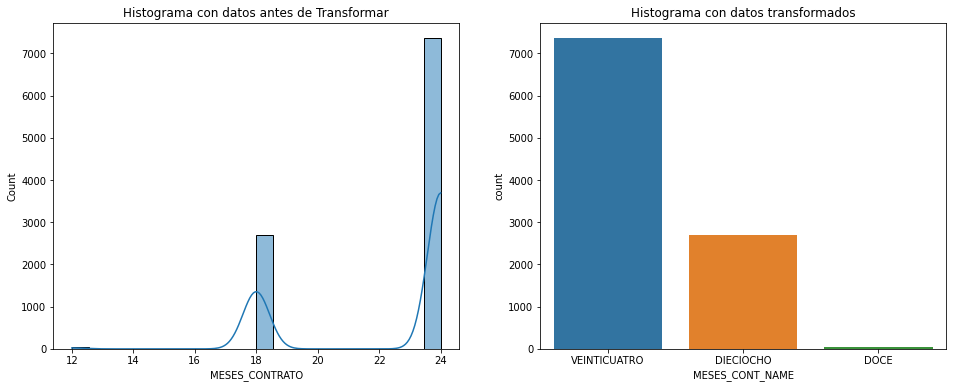

In [172]:
fig, axes = plt.subplots(ncols=2, figsize =(16,6))
sns.histplot(data = df_train, x = 'MESES_CONTRATO', ax = axes[0], kde=True)
axes[0].set_title('Histograma con datos antes de Transformar')
sns.countplot(data = df_train, x = 'MESES_CONT_NAME')
axes[1].set_title('Histograma con datos transformados')

**COMENTARIO**

Este predictor son los MESES CONTRATADOS por el cliente, el tipo era numerico y se categorizo, con el proposito de evitar que el modelo pueda tomar importancia numerica y se le asigno un Frecuency Count Encoder normalizado con la intencion de darle peso a traves del porcentaje de cada uno de los parametros.

# DEPARTAMENTO_GUATEMALA

**Frequent Count Enconder** 

In [173]:
count_enc_depto = CountEncoder( combine_min_nan_groups=True, min_group_size=35,min_group_name='OTROS')

In [174]:
df_train['DEPARTAMENTO_GUATEMALA'] =  df_recortado['DEPARTAMENTO_GUATEMALA']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [175]:
df_train['DEPARTAMENTO_TRANS'] = count_enc_depto.fit_transform(df_train['DEPARTAMENTO_GUATEMALA'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [176]:
count_enc_depto.mapping

{'DEPARTAMENTO_GUATEMALA': GUATEMALA         6617
 ESCUINTLA          386
 SACATEPEQUEZ       355
 HUEHUETENANGO      348
 ALTA VERAPAZ       274
 QUETZALTENANGO     250
 SAN MARCOS         215
 JUTIAPA            153
 QUICHE             150
 CHIMALTENANGO      147
 SANTA ROSA         143
 CHIQUIMULA         142
 PETEN              129
 IZABAL             127
 ZACAPA             103
 RETALHULEU         100
 SUCHITEPEQUEZ       89
 SOLOLA              82
 JALAPA              78
 BAJA VERAPAZ        73
 EL PROGRESO         53
 TOTONICAPAN         48
 OTROS               43
 Name: DEPARTAMENTO_GUATEMALA, dtype: int64}

In [177]:
df_train.head()

,CUOTA_BASICA,CAPACIDAD_PLAN_DATOS,ANEXOS_HOME,ANEXOS_MOBILE,MESES_CLIENTE_ANTIGUEDAD,MESES_CONTRATO,SUBSIDIO,PAGO_DEVICE_CLIENTE,CONSUMO_PORCENT_CUOTA,FACTURAS_PAGADAS_EN_TIEMPO,CANTIDAD_ABONOS_PARA_PAGAR_AVG,AVG_DIAS_PAGO_A_TIEMPO,MESES_CONT_NAME,MESES_CONT_TRANS,DEPARTAMENTO_GUATEMALA,DEPARTAMENTO_TRANS
1,499.0048,20,3.0,2.0,200.0,24.0,3042.17,1607.14,0.51,8.0,1.0,2.0,VEINTICUATRO,0.728451,ESCUINTLA,386
2,298.9952,15,0.0,3.0,98.0,24.0,1237.57,207.36,0.33,10.0,1.0,8.0,VEINTICUATRO,0.728451,GUATEMALA,6617
4,298.9952,15,0.0,1.0,16.0,24.0,1441.82,0.90,0.50,6.0,2.0,18.0,VEINTICUATRO,0.728451,SAN MARCOS,215
5,598.9984,25,0.0,3.0,76.0,18.0,3194.77,1428.57,0.10,10.0,1.0,1.0,DIECIOCHO,0.267194,GUATEMALA,6617
6,298.9952,15,1.0,1.0,68.0,18.0,-299.27,-401.79,0.73,9.0,1.0,22.0,DIECIOCHO,0.267194,GUATEMALA,6617


**COMENTARIO**

Esta variable significa el departamento de ubicacion geografica del cliente.  Se utilizo el Count Encoder para poder darle importancia numerica al departamento donde mas se ubica el cliente.

# SUBSIDIO

**QuantileTransformer**

In [178]:
from sklearn.preprocessing import QuantileTransformer

In [179]:
subsidio_scaler = QuantileTransformer( output_distribution='normal')

In [180]:
col_name = 'SUBSIDIO'
trans_col_name = 'SUBSIDIO_MM'
df_train[trans_col_name] = subsidio_scaler.fit_transform(df_train[[col_name]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



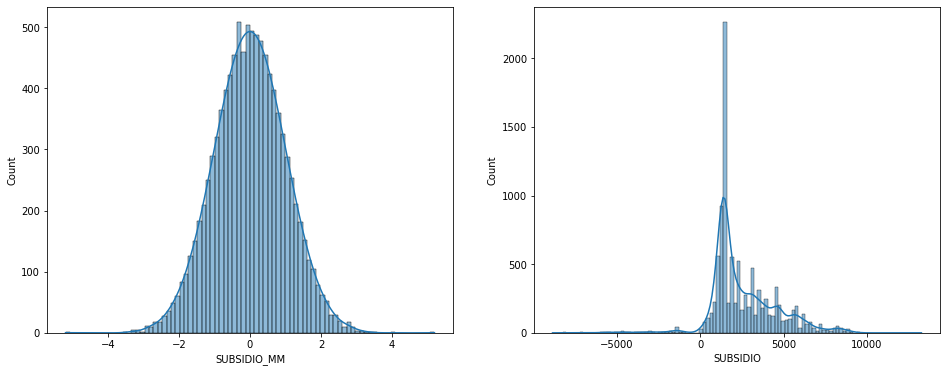

In [181]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=df_train,x=trans_col_name,ax=axes[0], kde=True)
sns.histplot(data=df_train, x=col_name, ax=axes[1], kde=True)

**COMENTARIO**

Esta predictor tiene el valor de subsidio que recibe cada cliente, para el pago de su dispositivo telefonico. Contiene valores negativos, debido a que algunos clientes pagan por anticipado, y se intento centrar los datos, para que tengan una distribucion normal.

# CAPACIDAD DEL PLAN DE DATOS

**One Hot Encoder**

In [182]:
from category_encoders import OneHotEncoder

In [183]:
df_train['CAP_PLAN_ENC'] = df_train['CAPACIDAD_PLAN_DATOS'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [184]:
onehot_enc = OneHotEncoder( use_cat_names=True)

In [185]:
df_train_caplan = onehot_enc.fit_transform(df_train['CAP_PLAN_ENC'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [186]:
 df_train = pd.concat([df_train, df_train_caplan], axis=1)

In [187]:
onehot_enc.mapping[0]['mapping']

,CAP_PLAN_ENC_20,CAP_PLAN_ENC_15,CAP_PLAN_ENC_25,CAP_PLAN_ENC_10,CAP_PLAN_ENC_70,CAP_PLAN_ENC_16,CAP_PLAN_ENC_30,CAP_PLAN_ENC_60,CAP_PLAN_ENC_40,CAP_PLAN_ENC_50,CAP_PLAN_ENC_14,CAP_PLAN_ENC_6,CAP_PLAN_ENC_5,CAP_PLAN_ENC_12,CAP_PLAN_ENC_7,CAP_PLAN_ENC_1,CAP_PLAN_ENC_9,CAP_PLAN_ENC_8
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


**COMENTARIO**

Este feature nos indica la capacidad de navegacion incluida dentro del plan contratado.  Los valores que presenta son numericos, que nos dan una categoria y para evitar que el modelo le de peso a los valores numericos, se transformo utilizando one-hot-encoder.

# MESES_CLIENTE_ANTIGUEDAD

**POWER TRANSFORMER, YEO-JOHNSON**

Este predictor es el numero de meses que tiene de permanecer el cliente dentro de TIGO.  Utilizaremos una transformacion de PowerTransformer Yeo-Johnson.  Intenteramos que sea una distribucion normal.

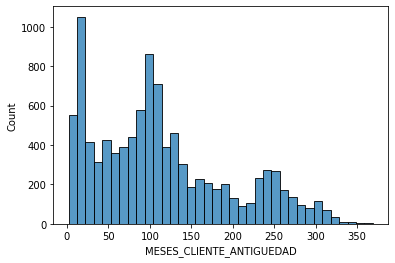

In [188]:
sns.histplot(data = df_train, x = "MESES_CLIENTE_ANTIGUEDAD")

In [189]:
from sklearn.preprocessing import PowerTransformer

In [190]:
scaler = PowerTransformer()

In [191]:
col_name ='MESES_CLIENTE_ANTIGUEDAD'
trans_col_name='MESES_CLIENTE_ANTIGUEDAD_RB'
df_train[trans_col_name] = scaler.fit_transform(df_train[[col_name]])

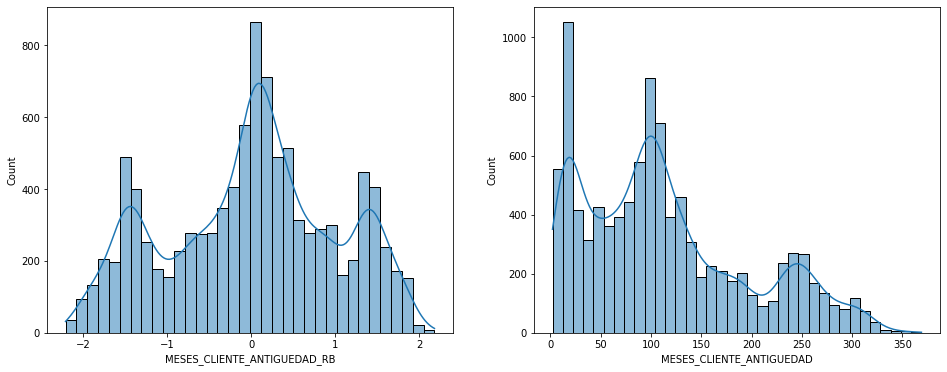

In [192]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=df_train, x=trans_col_name, ax=axes[0], kde=True)
sns.histplot(data=df_train, x=col_name, ax=axes[1], kde=True)

In [193]:
df_train.head()

,CUOTA_BASICA,CAPACIDAD_PLAN_DATOS,ANEXOS_HOME,ANEXOS_MOBILE,MESES_CLIENTE_ANTIGUEDAD,MESES_CONTRATO,SUBSIDIO,PAGO_DEVICE_CLIENTE,CONSUMO_PORCENT_CUOTA,FACTURAS_PAGADAS_EN_TIEMPO,CANTIDAD_ABONOS_PARA_PAGAR_AVG,AVG_DIAS_PAGO_A_TIEMPO,MESES_CONT_NAME,MESES_CONT_TRANS,DEPARTAMENTO_GUATEMALA,DEPARTAMENTO_TRANS,SUBSIDIO_MM,CAP_PLAN_ENC,CAP_PLAN_ENC_20,CAP_PLAN_ENC_15,CAP_PLAN_ENC_25,CAP_PLAN_ENC_10,CAP_PLAN_ENC_70,CAP_PLAN_ENC_16,CAP_PLAN_ENC_30,CAP_PLAN_ENC_60,CAP_PLAN_ENC_40,CAP_PLAN_ENC_50,CAP_PLAN_ENC_14,CAP_PLAN_ENC_6,CAP_PLAN_ENC_5,CAP_PLAN_ENC_12,CAP_PLAN_ENC_7,CAP_PLAN_ENC_1,CAP_PLAN_ENC_9,CAP_PLAN_ENC_8,MESES_CLIENTE_ANTIGUEDAD_RB
1,499.0048,20,3.0,2.0,200.0,24.0,3042.17,1607.14,0.51,8.0,1.0,2.0,VEINTICUATRO,0.728451,ESCUINTLA,386,0.438146,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.046693
2,298.9952,15,0.0,3.0,98.0,24.0,1237.57,207.36,0.33,10.0,1.0,8.0,VEINTICUATRO,0.728451,GUATEMALA,6617,-1.016778,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.045520
4,298.9952,15,0.0,1.0,16.0,24.0,1441.82,0.90,0.50,6.0,2.0,18.0,VEINTICUATRO,0.728451,SAN MARCOS,215,-0.391717,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.478549
5,598.9984,25,0.0,3.0,76.0,18.0,3194.77,1428.57,0.10,10.0,1.0,1.0,DIECIOCHO,0.267194,GUATEMALA,6617,0.537884,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.245056
6,298.9952,15,1.0,1.0,68.0,18.0,-299.27,-401.79,0.73,9.0,1.0,22.0,DIECIOCHO,0.267194,GUATEMALA,6617,-2.060319,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.362746


**COMENTARIO**

Se puede observar que existen modas, lo que nos hace pensar que se puede deber a los tres productos que tenemos en el dataset. Los cuales son 1) Credito 2) Factura Fija 3) Sin Contrato.  Se tomara su importancia a la hora de generar el modelo.

## PAGO DEVICE CLIENTE

In [194]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 1 to 17466
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CUOTA_BASICA                    10105 non-null  float64
 1   CAPACIDAD_PLAN_DATOS            10105 non-null  int64  
 2   ANEXOS_HOME                     10105 non-null  float64
 3   ANEXOS_MOBILE                   10105 non-null  float64
 4   MESES_CLIENTE_ANTIGUEDAD        10105 non-null  float64
 5   MESES_CONTRATO                  10105 non-null  float64
 6   SUBSIDIO                        10105 non-null  float64
 7   PAGO_DEVICE_CLIENTE             10105 non-null  float64
 8   CONSUMO_PORCENT_CUOTA           10105 non-null  float64
 9   FACTURAS_PAGADAS_EN_TIEMPO      10105 non-null  float64
 10  CANTIDAD_ABONOS_PARA_PAGAR_AVG  10105 non-null  float64
 11  AVG_DIAS_PAGO_A_TIEMPO          10105 non-null  float64
 12  MESES_CONT_NAME                 

In [204]:
df_train['PAGO_DEVICE_CLIENTE'] = df_train['PAGO_DEVICE_CLIENTE'].abs() 

In [218]:
##pagoCliente_scaler = QuantileTransformer( output_distribution='normal'  )
pagoCliente_scaler = PowerTransformer()

In [219]:
col_name = 'PAGO_DEVICE_CLIENTE'
trans_col_name = 'PAGO_DEVICE_CLIENTE_TM'
df_train[trans_col_name] = pagoCliente_scaler.fit_transform(df_train[[col_name]])

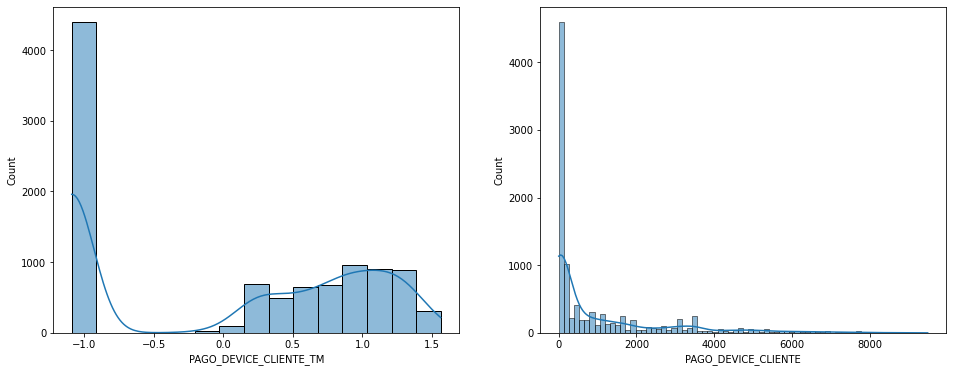

In [220]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=df_train,x=trans_col_name,ax=axes[0], kde=True)
sns.histplot(data=df_train, x=col_name, ax=axes[1], kde=True)

## Revisar Predictores contra Variable de Salida

**CUOTA** BASICA

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [225]:
X_train = df_train[['CUOTA_BASICA']]
y_train = df_recortado['DOWNSELL']

In [226]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [227]:
roc_curve = metrics.plot_roc_curve(clf, X_test, y_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

NameError: ignored